In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import warnings

# Check event stats

In [ ]:
fn = os.path.join('/scratch/cascade/UEH-daily/stats/wbgtmax30_STATS.json')

In [ ]:
df = pd.read_json(fn, orient = 'split')

In [ ]:
df.head()

In [ ]:
# Dehli 6955, Kolkata 9691

In [ ]:
def mk_data(df, id_):
    data = df[df['ID_HDC_G0'] == id_][['year','duration']].groupby('year').sum()
    pd.DataFrame(data.reset_index(inplace = True))
    
    return data

In [ ]:
dehli = mk_data(df, 6955)
kolkata = mk_data(df, 9691)

In [ ]:
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.plot(dehli['year'], dehli['duration'], color = 'cornflowerblue', linewidth = 3)
plt.plot(kolkata['year'], kolkata['duration'], color = 'chocolate', linewidth = 3)
plt.legend(['Deli','Kolata'], fontsize = 15)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('days/yr wbgt-max > 30°C', fontsize = 15)

In [ ]:
#### Args
DATA = 'wbgt30' # Always update WBGT32_1D, WBGT28_1D, HI406_1D HI406_2D & HI461_1D 
DATA_PATH = os.path.join('/scratch/cascade/UEH-daily/stats/')
FN_POP = os.path.join('/home/cascade/projects/UrbanHeat/data/interim/GHS-UCDB-Interp.csv')
FN_STATS = os.path.join(DATA_PATH, DATA+'_STATS.json')
FN_OUT = os.path.join(DATA_PATH, DATA+'_EXP.json') 

In [ ]:
FN_STATS

In [ ]:
FN_STATS = os.path.join('/scratch/cascade/UEH-daily/stats/wbgtmax30_STATS.json')

In [ ]:
stats = pd.read_json(FN_STATS, orient = 'split') # read in stats
df_pop = pd.read_csv(FN_POP) # read in interp population from GHS-UCDB

In [ ]:
len(np.unique(stats['ID_HDC_G0']))

In [ ]:
stats

In [ ]:
def tot_days(df):
    """ Calulates the total number of days per year when a heat threshold was met
    """
    df_out = df[['ID_HDC_G0','year','duration']].groupby(['ID_HDC_G0','year']).sum().reset_index()
    df_out.rename(columns={'duration':'tot_days'}, inplace=True)
    
    return df_out

In [ ]:
#### Args
DATA = 'wbgtmax30' # Always update WBGT32_1D, WBGT28_1D, HI406_1D HI406_2D & HI461_1D 
DATA_PATH = os.path.join('/scratch/cascade/UEH-daily/stats/')
FN_POP = os.path.join('/home/cascade/projects/UrbanHeat/data/interim/GHS-UCDB-Interp.csv')
FN_STATS = os.path.join(DATA_PATH, DATA+'_STATS.json')
FN_OUT = os.path.join(DATA_PATH, DATA+'_EXP.json') 

In [ ]:
df = pd.read_json(FN_OUT, orient = 'split')

In [ ]:
df

# Check TREND

In [8]:
fn = '/scratch/cascade/UEH-daily/stats/wbgtmax30_TREND_PDAYS05.json'

In [9]:
trend = pd.read_json(fn, orient = 'split')
len(trend)

6269

In [10]:
trend.head(2)

,ID_HDC_G0,coef_pdays,p_value_pdays,coef_heat,p_value_heat,coef_pop,p_value_pop,coef_totDays,p_value_totDays,coef_attrib,CTR_MN_NM,UC_NM_MN,GCPNT_LAT,GCPNT_LON,region,sub-region,intermediate-region,P1983,P2016,coef_attrib_norm
22,52,101604.735492,0.0007,28022.279616,0.0764,73582.455875,0.0,0.280825,0.0764,0.448406,Mexico,La Paz [MEX],24.117658,-110.310119,Americas,Latin America and the Caribbean,Central America,99785.538677,249632.317993,0.780879
26,57,531741.922626,0.0002,-36648.428326,0.6062,568390.350952,0.0,-0.084798,0.6062,1.137843,Mexico,Mexicali [MEX]; Calexico [USA],32.625439,-115.447658,Americas,Latin America and the Caribbean,Central America,432187.321425,805239.718513,0.876066


In [11]:
min(trend['coef_attrib'])

-5.207463696

In [ ]:
norm = trend['coef_attrib']
plt.hist((norm-min(norm))/(max(norm)-min(norm)));

In [ ]:
plt.hist(trend['coef_attrib_norm']);

## coef attrib is not working, check it

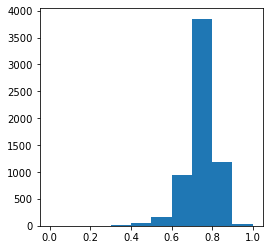

In [12]:
data = trend['coef_attrib_norm'].values
fig = plt.gcf()
fig.set_size_inches(4, 4)

plt.hist(data);

In [ ]:
test = trend#.iloc[:1000,:]

In [ ]:
coef_attrib = (trend['coef_pop'] - trend['coef_heat']) / (trend['coef_pop'] + trend['coef_heat'])

In [ ]:
fig = plt.gcf()
fig.set_size_inches(4, 4)

plt.hist(coef_attrib);
plt.xlim([-5,5])

In [ ]:
plt.hist(trend['coef_attrib'])
plt.xlim([-5,5])

In [ ]:
df = pd.DataFrame()
df['coef_attrib'] = coef_attrib
norm = df['coef_attrib']
df['coef_attrib_norm'] = (norm-min(norm))/(max(norm)-min(norm))

In [ ]:
df

In [ ]:
fig = plt.gcf()
fig.set_size_inches(4, 4)

plt.hist(df['coef_attrib_norm']);

In [ ]:
df['norm_old'] = trend['coef_attrib_norm']
df['coef_attrib_old'] = trend['coef_attrib']

In [ ]:
df.head()

In [ ]:
min(df['coef_attrib'])

In [ ]:
test = trend

In [ ]:
# attrib coef --- creates range index of heat vs. population as a driver of total pdays increase
out = pd.DataFrame()
out['coef_attrib'] = (test['coef_pop'] - test['coef_heat']) / (test['coef_pop'] + test['coef_heat'])  

# normalize coef of attribution 0 to 1
norm = test['coef_attrib']
out['coef_attrib_norm'] = (norm-min(norm))/(max(norm)-min(norm))

In [ ]:
out

In [ ]:
plt.hist(out['coef_attrib_norm'])

# WBGT

In [ ]:
# Functions
def c_to_f(C):
    "Convert HI C to F"
    return 1.8 * C + 32

def F_to_C(Tmax_F):
    "Function converts temp in F to C"
    Tmax_C = (Tmax_F - 32) * (5/9)
    
    return Tmax_C

def hi_to_wbgt(HI):
    """ Convert HI to WBGT using emprical relationship from Bernard and Iheanacho 2015
    WBGT [◦C] = −0.0034 HI2 + 0.96 HI−34; for HI [◦F]
    Args:
        HI = heat index as an array
    """
    
    WBGT = -0.0034*HI**2 + 0.96*HI - 34
    
    return WBGT

In [ ]:
hi_to_wbgt(105)

In [ ]:
c_to_f(29)